Import some packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys

In [36]:
class MS_DataGenerator:
  def __init__(self,mz_ms1_range=[0,1000],mz_ms2_range=[0,500],int_ms1_range=[1000,10000],int_ms2_range=[1000,10000], ms2_mz_var=0.1):
    self.mz_MS1 = np.random.uniform(mz_ms1_range[0],mz_ms1_range[1],1)
    self.intensity_MS1 = np.random.uniform(int_ms1_range[0],int_ms1_range[1],1)
    mz_MS2_initial = np.random.uniform(mz_ms2_range[0],mz_ms2_range[1],1)
    n1=random.sample([2,3,4],1)
    self.mz_MS2 = np.random.normal(mz_MS2_initial,ms2_mz_var,n1)
    self.intensity_MS2 = np.random.uniform(int_ms2_range[0],int_ms2_range[1],n1)

p1 = MS_DataGenerator()
print(p1.mz_MS1)
print(p1.intensity_MS1)
print(p1.mz_MS2)
print(p1.intensity_MS2)



[679.59546026]
[7136.31298406]
[148.16351731 148.49738899 148.39495003]
[7504.02583936 6438.87505538 8604.81591715]


In [13]:
class MS_DataGenerator_multi:
  def __init__(self,n,mz_ms1_range=[0,1000],mz_ms2_range=[0,500],int_ms1_range=[1000,10000],int_ms2_range=[1000,10000], ms2_mz_var=0.1):
    self.mz_MS1=[]
    self.intensity_MS1=[]
    self.mz_MS2=[]
    self.intensity_MS2=[]
    for i in range(0,n):
        datum = MS_DataGenerator()
        self.mz_MS1.extend(datum.mz_MS1)
        self.intensity_MS1.extend(datum.intensity_MS1)
        self.mz_MS2.append(datum.mz_MS2)
        self.intensity_MS2.append(datum.intensity_MS2)

Data=MS_DataGenerator_multi(100)
#print(Data.mz_MS1)
#print(Data.intensity_MS1)
#print(Data.mz_MS2)
#print(Data.intensity_MS2)

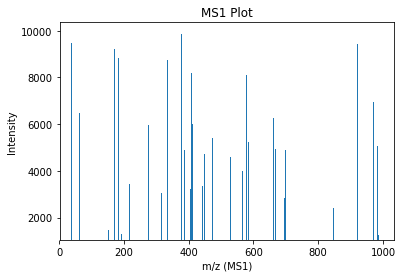

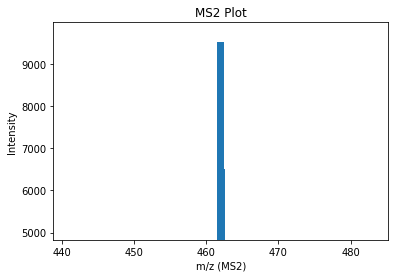

In [29]:

class MSplot:
  def __init__(self,Data,MStype,index=None,width=1,xlabel=0,ylabel=0,title=0,ylim=0,xlim=0,colours=None):
    if MStype == "MS1":
        plt.bar(Data.mz_MS1, Data.intensity_MS1,width=width)
        if xlabel==0:
            plt.xlabel("m/z (MS1)")
        else:
            plt.xlabel(xlabel)
        
        if ylabel==0:
            plt.ylabel("Intensity")
        else:
            plt.ylabel(ylabel)
        
        if title==0:
            plt.title("MS1 Plot")
        else:
            plt.title(title)

        if xlim==0:
            plt.xlim([min(Data.mz_MS1)*0.95,max(Data.mz_MS1)*1.05])
        else:
            plt.xlim(xlim)
            
        if ylim==0:
            plt.ylim([min(Data.intensity_MS1)*0.95,max(Data.intensity_MS1)*1.05])
        else:
            plt.ylim(ylim)
            
        plt.show()
             
    elif MStype == "MS2":
        if index is None :
            sys.exit("'index' is must be defined for MS2")
            
        if colours is None:
            plt.bar(Data.mz_MS2[index], Data.intensity_MS2[index],width=width)
        else:
            p=plt.bar(Data.mz_MS2[index], Data.intensity_MS2[index],width=width)
            for i in range(0,len(Data.mz_MS2[index])):
                p[i].set_color(colours[i])
        
        if xlabel==0:
            plt.xlabel("m/z (MS2)")
        else:
            plt.xlabel(xlabel)
        
        if ylabel==0:
            plt.ylabel("Intensity")
        else:
            plt.ylabel(ylabel)
        
        if title==0:
            plt.title("MS2 Plot")
        else:
            plt.title(title)

        if xlim==0:
            plt.xlim([min(Data.mz_MS2[index])*0.95,max(Data.mz_MS2[index])*1.05])
        else:
            plt.xlim(xlim)
            
        if ylim==0:
            plt.ylim([min(Data.intensity_MS2[index])*0.95,max(Data.intensity_MS2[index])*1.05])
        else:
            plt.ylim(ylim)
            
        plt.show()
    else:
        sys.exit("Use either 'MS1' or 'MS2' for MStype")

plot1 = MSplot(Data,MStype="MS1")
plot2 = MSplot(Data,MStype="MS2",index=0)